<a href="https://colab.research.google.com/github/vaneesa-writes/micro_project/blob/main/nuceli_seg12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ! pip install -q kaggle
# from google.colab import files
# files.upload()
# ! mkdir ~/.kaggle
# ! cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [ ]:
# !kaggle competitions download -c data-science-bowl-2018

In [3]:
import tensorflow as tf
import os
import random
import numpy as np
 
from tqdm import tqdm 

from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt
import os

In [4]:
seed = 42
np.random.seed = seed

IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

In [5]:
# os.mkdir('test')

In [ ]:
# !unzip /content/stage1_test.zip

In [7]:
# import shutil
# lis = os.listdir()
# for ele in lis:
#   if(len(ele)>40):
#     source = ele+'/'
#     destination = '/content/test/'
    
#     shutil.move(source , destination)

In [8]:
# print(len(os.listdir('/content/test/')))

65


In [ ]:
# !unzip /content/stage1_train.zip

In [10]:
# os.mkdir('train')

In [11]:
# import shutil
# lis = os.listdir()
# for ele in lis:
#   if(len(ele)>40):
#     source = ele+'/'
#     destination = '/content/train/'
    
#     shutil.move(source , destination)

In [12]:
# print(len(os.listdir('/content/train/')))

670


In [ ]:
lis = os.listdir('train/1815cf307859b3e13669041d181aa3b3dbbac1a95aef4c42164b223110c09168/masks')
lis

The train set has 670 images and 65 in test set

In [14]:
TRAIN_PATH = 'train/'
TEST_PATH = 'test/'

train_ids = next(os.walk(TRAIN_PATH))[1]
test_ids = next(os.walk(TEST_PATH))[1]



In [15]:
X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)

In [16]:
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):   
    path = TRAIN_PATH + id_
    img = imread(path + '/images/' + id_ + '.png')[:,:,:IMG_CHANNELS]  
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_train[n] = img  
    mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
    for mask_file in next(os.walk(path + '/masks/'))[2]:
        mask_ = imread(path + '/masks/' + mask_file)
        mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant',  
                                      preserve_range=True), axis=-1)
        mask = np.maximum(mask, mask_)  
            
    Y_train[n] = mask
print(X_train.shape)

100%|██████████| 670/670 [06:08<00:00,  1.82it/s]

(670, 128, 128, 3)


In [17]:
X_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
sizes_test = []
for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
    path = TEST_PATH + id_
    #print(path + '/images/' + id_ + '.png')
    try:
      img = imread(path + '/images/' + id_ + '.png')[:,:,:IMG_CHANNELS]
      sizes_test.append([img.shape[0], img.shape[1]])
      img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
      X_test[n] = img
    except:
      print('fail')

100%|██████████| 65/65 [00:01<00:00, 33.80it/s]


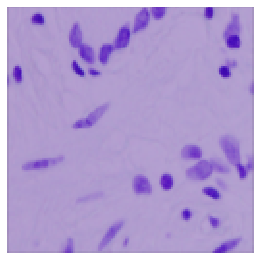

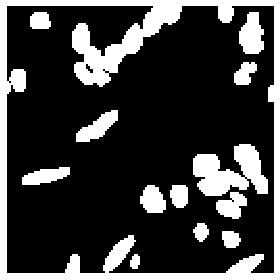

In [18]:
image_x = random.randint(0, len(train_ids))
#print(X_train[image_x].shape)
imshow(X_train[image_x])
plt.axis('off')
plt.show()
#print(Y_train[image_x].shape)
#print(np.squeeze(Y_train[image_x]).shape)
plt.axis('off')
imshow(np.squeeze(Y_train[image_x]))
plt.show()

In [19]:
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

#Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Expansive path 
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
 
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
 
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda (Lambda)                (None, 128, 128, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 16  448         ['lambda[0][0]']                 
                                )                                                                 
                                                                                              

In [20]:
checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_nuclei.h5', verbose=1, save_best_only=True)

callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
        tf.keras.callbacks.TensorBoard(log_dir='logs')]

results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=25, callbacks=callbacks)


Epoch 1/25
38/38 [==============================] - 15s 78ms/step - loss: 0.5856 - accuracy: 0.7854 - val_loss: 0.3991 - val_accuracy: 0.8283
Epoch 2/25
38/38 [==============================] - 1s 38ms/step - loss: 0.3062 - accuracy: 0.8431 - val_loss: 0.2371 - val_accuracy: 0.9027
Epoch 3/25
38/38 [==============================] - 1s 38ms/step - loss: 0.1840 - accuracy: 0.9292 - val_loss: 0.1297 - val_accuracy: 0.9494
Epoch 4/25
38/38 [==============================] - 1s 37ms/step - loss: 0.1503 - accuracy: 0.9407 - val_loss: 0.1140 - val_accuracy: 0.9550
Epoch 5/25
38/38 [==============================] - 1s 37ms/step - loss: 0.1348 - accuracy: 0.9487 - val_loss: 0.1332 - val_accuracy: 0.9481
Epoch 6/25
38/38 [==============================] - 1s 37ms/step - loss: 0.1292 - accuracy: 0.9508 - val_loss: 0.1075 - val_accuracy: 0.9582
Epoch 7/25
38/38 [==============================] - 1s 37ms/step - loss: 0.1215 - accuracy: 0.9537 - val_loss: 0.0988 - val_accuracy: 0.9620
Epoch 8/25
3

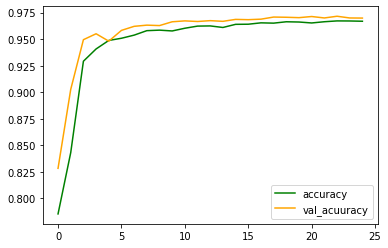

In [21]:
plt.style.use('_classic_test_patch')
plt.plot(results.history['accuracy'],c='green',label='accuracy')
plt.plot(results.history['val_accuracy'],c='orange',label='val_acuuracy')
plt.legend()
plt.show()

In [22]:

idx = random.randint(0, len(X_train))


preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
preds_test = model.predict(X_test, verbose=1)

 
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)



3/3 [==============================] - 0s 136ms/step


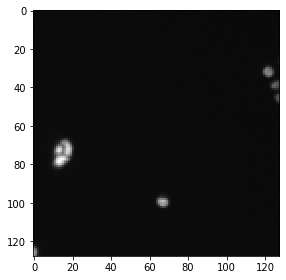

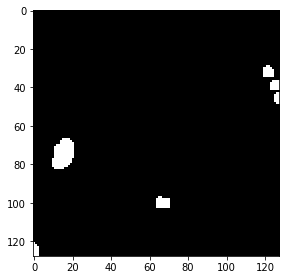

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


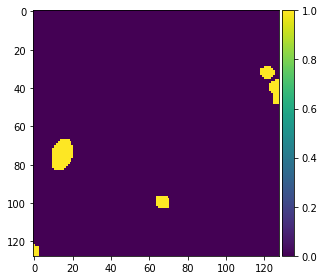

In [23]:
ix = random.randint(0, len(preds_train_t))
imshow(X_train[ix])
plt.show()
imshow(np.squeeze(Y_train[ix]))
plt.show()
imshow(np.squeeze(preds_train_t[ix]))
plt.show()


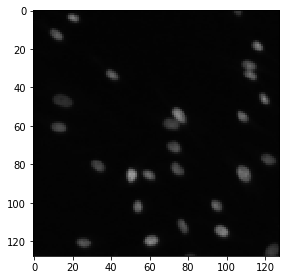

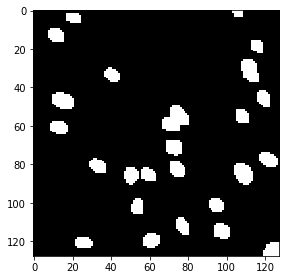

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


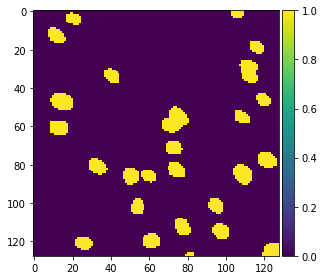

In [61]:
ix = random.randint(0, len(preds_val_t))
imshow(X_train[int(X_train.shape[0]*0.9):][ix])
plt.show()
imshow(np.squeeze(Y_train[int(Y_train.shape[0]*0.9):][ix]))
plt.show()
imshow(np.squeeze(preds_val_t[ix]))
plt.savefig("output.jpg")
plt.show()

In [62]:
!ls

BBBC035exampleimage2.jpg	  stage1_test.zip
kaggle.json			  stage1_train_labels.csv.zip
labeled_cast_iron.jpg		  stage1_train.zip
logs				  stage2_sample_submission_final.csv.zip
output.jpg			  stage2_test_final.zip
sample_data			  test
stage1_sample_submission.csv.zip  train
stage1_solution.csv.zip


In [25]:

!wget https://data.broadinstitute.org/bbbc/BBBC035/BBBC035exampleimage2.jpg

--2022-01-25 14:06:34--  https://data.broadinstitute.org/bbbc/BBBC035/BBBC035exampleimage2.jpg
Resolving data.broadinstitute.org (data.broadinstitute.org)... 69.173.92.29
Connecting to data.broadinstitute.org (data.broadinstitute.org)|69.173.92.29|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26803 (26K) [image/jpeg]
Saving to: ‘BBBC035exampleimage2.jpg’

BBBC035exampleimage 100%[===================>]  26.17K  --.-KB/s    in 0.03s   

2022-01-25 14:06:34 (977 KB/s) - ‘BBBC035exampleimage2.jpg’ saved [26803/26803]



In [30]:
from keras.preprocessing import image


(128, 128)


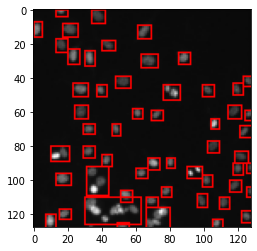

In [102]:
from skimage import measure, io, img_as_ubyte
import matplotlib.pyplot as plt
from skimage.color import label2rgb, rgb2gray
import numpy as np
import cv2
from skimage.measure import label, regionprops

image = np.squeeze(preds_val_t[ix+1])
img_1=X_train[int(X_train.shape[0]*0.9):][ix+1]
#plt.imshow(img_1)
print(image.shape)
lbl_0 = label(image) 
props = regionprops(lbl_0)
#plt.imshow(image)
for prop in props:
  #print('Found bbox', prop.bbox)
  cv2.rectangle(img_1, (prop.bbox[1], prop.bbox[0]), (prop.bbox[3], prop.bbox[2]), (255, 0, 0), 1)
plt.imshow(img_1)

#image_rgb = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
# plt.imshow(image_rgb)

# from skimage.filters import threshold_otsu
# threshold = threshold_otsu(image)

#Label connected regions of an integer array using measure.label
#Labels each connected entity as one object
#Connectivity = Maximum number of orthogonal hops to consider a pixel/voxel as a neighbor. 
#If None, a full connectivity of input.ndim is used, number of dimensions of the image
#For 2D image it would be 2

# label_image = measure.label(image < threshold, connectivity=image.ndim)

# plt.imshow(label_image)

# print(label_image.shape,image.shape)

#plt.imshow(label_image)
#Return an RGB image where color-coded labels are painted over the image.
#Using label2rgb

# image_label_overlay = label2rgb(label_image, image=image)
# plt.imshow(image_label_overlay)
# img_1 = image.copy()
# props = regionprops(label_image)

# for prop in props:
    #print('Found bbox', prop.bbox)
    # cv2.rectangle(img_1, (prop.bbox[1], prop.bbox[0]), (prop.bbox[3], prop.bbox[2]), (225, 0, 0),1)
#image_rgb = cv2.cvtColor(img_1, cv2.COLOR_RGB2BGR)
#plt.imshow(img_1)

In [45]:
cv2.rectangle?

In [87]:
!wget https://m.media-amazon.com/images/I/51UW1849rJL._AC_SX466_.jpg

--2022-01-25 15:03:53--  https://m.media-amazon.com/images/I/51UW1849rJL._AC_SX466_.jpg
Resolving m.media-amazon.com (m.media-amazon.com)... 65.8.181.149, 2600:9000:21f2:3e00:1d:d7f6:39cf:a761, 2600:9000:21f2:6200:1d:d7f6:39cf:a761, ...
Connecting to m.media-amazon.com (m.media-amazon.com)|65.8.181.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3663 (3.6K) [image/jpeg]
Saving to: ‘51UW1849rJL._AC_SX466_.jpg’

51UW1849rJL._AC_SX4 100%[===================>]   3.58K  --.-KB/s    in 0s      

2022-01-25 15:03:53 (576 MB/s) - ‘51UW1849rJL._AC_SX466_.jpg’ saved [3663/3663]

